# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


In [4]:
# cities = cities[:5]
# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#         print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | childress
Processing Record 3 of Set 1 | tara
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | polyarnyy
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | ugoofaaru
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | lumphat
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | st. john's
Processing Record 15 of Set 1 | vanersborg
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | nadi
Processing Record 19 of Set 1 | tual
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | pacific grove
Processing Record 22 of Set 1 | thun

Processing Record 41 of Set 4 | posto fiscal rolim de moura
Processing Record 42 of Set 4 | bargara
City not found. Skipping...
Processing Record 43 of Set 4 | lazaro cardenas
Processing Record 44 of Set 4 | kitimat
Processing Record 45 of Set 4 | nova sintra
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | kailua-kona
Processing Record 48 of Set 4 | ouellah
City not found. Skipping...
Processing Record 49 of Set 4 | bilibino
Processing Record 0 of Set 5 | calama
Processing Record 1 of Set 5 | kudahuvadhoo
Processing Record 2 of Set 5 | baracoa
Processing Record 3 of Set 5 | west bay
Processing Record 4 of Set 5 | martapura
Processing Record 5 of Set 5 | megalopoli
Processing Record 6 of Set 5 | minas de marcona
Processing Record 7 of Set 5 | lihue
Processing Record 8 of Set 5 | twon-brass
Processing Record 9 of Set 5 | singaraja
Processing Record 10 of Set 5 | berrahal
Processing Record 11 of Set 5 | belmonte
Processing Record 12 of Set 5 | hamilton
Processi

Processing Record 31 of Set 8 | sterling
Processing Record 32 of Set 8 | orapa
Processing Record 33 of Set 8 | padre bernardo
Processing Record 34 of Set 8 | la toma
Processing Record 35 of Set 8 | santa marta
Processing Record 36 of Set 8 | north bay
Processing Record 37 of Set 8 | alice springs
Processing Record 38 of Set 8 | vadso
Processing Record 39 of Set 8 | nakamura
Processing Record 40 of Set 8 | birao
Processing Record 41 of Set 8 | duong dong
Processing Record 42 of Set 8 | igarka
Processing Record 43 of Set 8 | abraham's bay
City not found. Skipping...
Processing Record 44 of Set 8 | kristiansund
Processing Record 45 of Set 8 | sao felix do xingu
Processing Record 46 of Set 8 | al qitena
Processing Record 47 of Set 8 | gadzhiyevo
Processing Record 48 of Set 8 | alofi
Processing Record 49 of Set 8 | kodinsk
Processing Record 0 of Set 9 | oruro
Processing Record 1 of Set 9 | korla
Processing Record 2 of Set 9 | mount gambier
Processing Record 3 of Set 9 | san sebastian de la 

Processing Record 16 of Set 12 | ixtapa
Processing Record 17 of Set 12 | vila velha
Processing Record 18 of Set 12 | betio village
Processing Record 19 of Set 12 | morehead city
Processing Record 20 of Set 12 | turpan
Processing Record 21 of Set 12 | singrauli
Processing Record 22 of Set 12 | pangoa
Processing Record 23 of Set 12 | zapolyarnyy
Processing Record 24 of Set 12 | san jose del guaviare
Processing Record 25 of Set 12 | haiku-pauwela
Processing Record 26 of Set 12 | jwaneng
Processing Record 27 of Set 12 | ilembula
Processing Record 28 of Set 12 | vicuna
Processing Record 29 of Set 12 | male
Processing Record 30 of Set 12 | armacao de buzios
Processing Record 31 of Set 12 | mwene-ditu
Processing Record 32 of Set 12 | kingaroy
Processing Record 33 of Set 12 | mili
Processing Record 34 of Set 12 | alice town
Processing Record 35 of Set 12 | san pedro
Processing Record 36 of Set 12 | bembereke
Processing Record 37 of Set 12 | novyy turtkul'
Processing Record 38 of Set 12 | muzay

In [6]:
city_weather["main"]

{'temp': 44.02,
 'feels_like': 42.15,
 'temp_min': 44.02,
 'temp_max': 44.02,
 'pressure': 1018,
 'humidity': 91,
 'sea_level': 1018,
 'grnd_level': 999}

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Convert the max temp from Fahrenheit to Celsius
city_data_df['Max Temp'] = (city_data_df['Max Temp'] - 32) * 5/9
city_data_df['Max Temp'] = city_data_df['Max Temp'].round(2)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.23,91,100,8.99,NZ,1685909720
1,childress,34.4264,-100.2040,27.14,47,20,3.44,US,1685909720
2,tara,56.8944,74.3710,20.89,60,0,4.97,RU,1685909720
3,constantia,44.1833,28.6500,13.38,53,95,9.91,RO,1685909645
4,polyarnyy,69.1989,33.4478,4.48,68,100,11.65,RU,1685909133


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.23,91,100,8.99,NZ,1685909720
1,childress,34.4264,-100.2040,27.14,47,20,3.44,US,1685909720
2,tara,56.8944,74.3710,20.89,60,0,4.97,RU,1685909720
3,constantia,44.1833,28.6500,13.38,53,95,9.91,RO,1685909645
4,polyarnyy,69.1989,33.4478,4.48,68,100,11.65,RU,1685909133


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

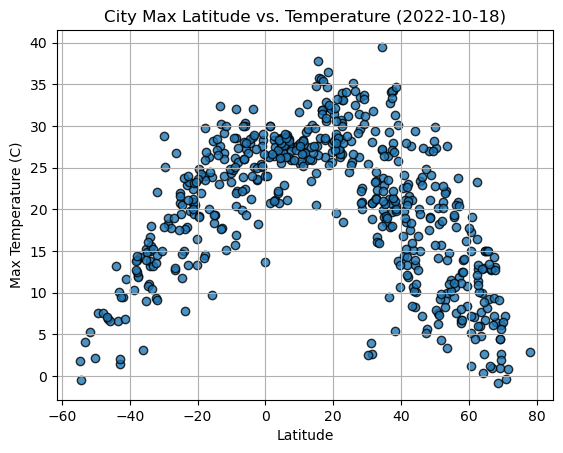

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x="Lat", y="Max Temp", data=city_data_df, alpha=0.8, edgecolor='black', linewidth=1.0)
plt.grid(True)

# Set the plot title and axis labels
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

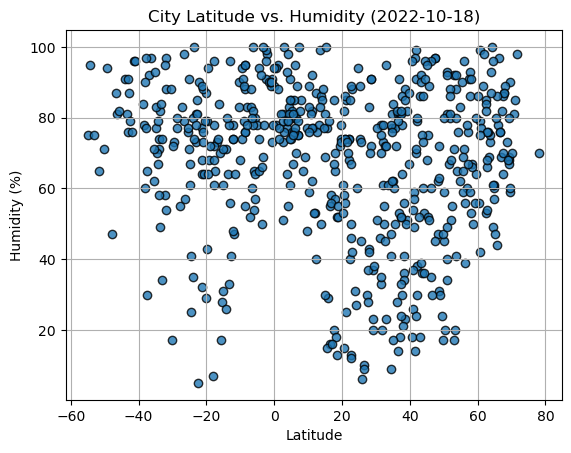

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x="Lat", y="Humidity", data=city_data_df, alpha=0.8, edgecolor='black', linewidth=1.0)
plt.grid(True)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

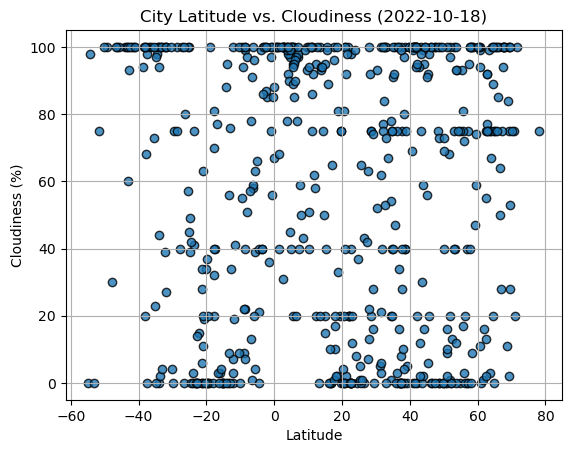

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x="Lat", y="Cloudiness", data=city_data_df, alpha=0.8, edgecolor='black', linewidth=1.0)
plt.grid(True)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

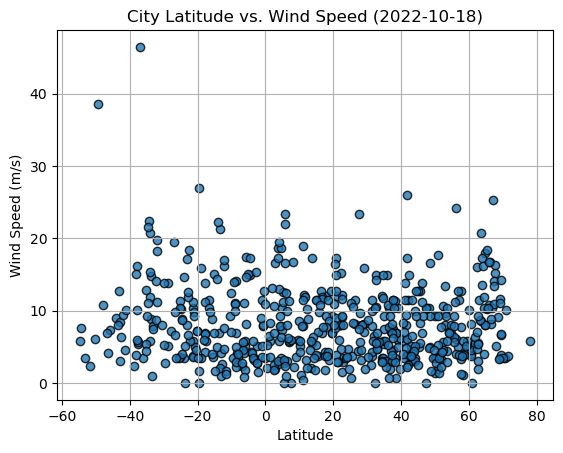

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x="Lat", y="Wind Speed", data=city_data_df, alpha=0.8, edgecolor='black', linewidth=1.0)
plt.grid(True)


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    y_pred = slope * x + intercept
    plt.scatter(x, y, alpha=0.8, edgecolor='black', linewidth=1.0)
    plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {r_value}")
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(equation, xy=(0.05, 0.1), xycoords='axes fraction', fontsize=16, color='red')
    plt.show()
    

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,childress,34.4264,-100.2040,27.14,47,20,3.44,US,1685909720
2,tara,56.8944,74.3710,20.89,60,0,4.97,RU,1685909720
3,constantia,44.1833,28.6500,13.38,53,95,9.91,RO,1685909645
4,polyarnyy,69.1989,33.4478,4.48,68,100,11.65,RU,1685909133
6,ugoofaaru,5.6667,73.0000,28.02,80,100,21.90,MV,1685909722


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.23,91,100,8.99,NZ,1685909720
5,edinburgh of the seven seas,-37.0676,-12.3116,14.27,92,100,46.44,SH,1685909721
7,port-aux-francais,-49.3500,70.2167,7.55,94,100,38.54,TF,1685909722
8,grytviken,-54.2811,-36.5092,-0.48,95,98,7.61,GS,1685909722
9,adamstown,-25.0660,-130.1015,21.95,71,45,11.32,PN,1685909723


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7402635146385781


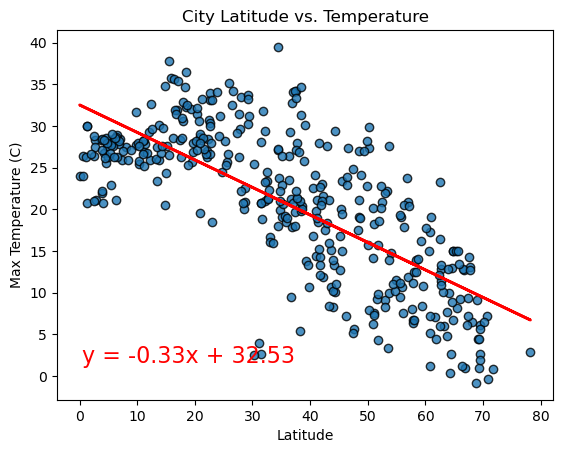

In [24]:
# Linear regression on Northern Hemisphere
latitude = northern_hemi_df['Lat']
temperature = northern_hemi_df['Max Temp']

linear_regression_plot(latitude, temperature,  'Latitude','Max Temperature (C)', 'City Latitude vs. Temperature')


The r-value is: 0.8124896200657076


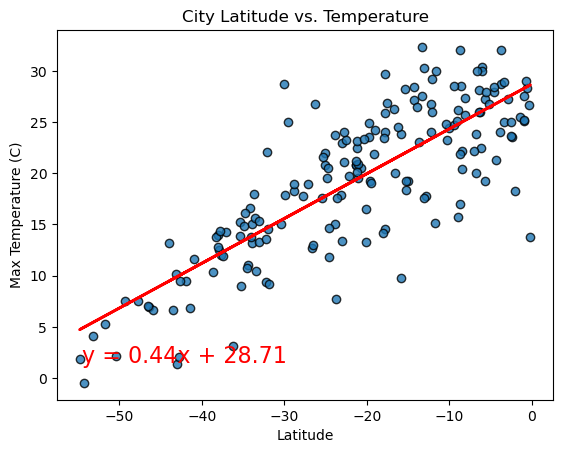

In [25]:
# Linear regression on Southern Hemisphere
latitude = southern_hemi_df['Lat']
temperature = southern_hemi_df['Max Temp']

linear_regression_plot(latitude, temperature,  'Latitude','Max Temperature (C)', 'City Latitude vs. Temperature')



**Discussion about the linear relationship:** There is a notable linear relationship between latitude on maximum temperature. With an r-value of 0.81 for the southern hemisphere, it shows that there is a positive correlation between maximum temperature increase as latitube gets closer to 0. With an r-value of -0.74 for the northern hemisphere, it shows that there is a negative correlation between maximum temperature increase as latitube gets closer to 0. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.005117782466537728


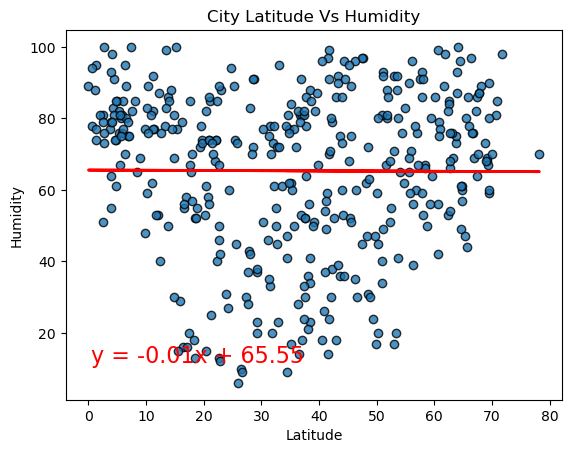

In [26]:
# Northern Hemisphere Humidity vs. Latitude 
latitude = northern_hemi_df['Lat']
humidity = northern_hemi_df['Humidity']

linear_regression_plot(latitude, humidity,  'Latitude','Humidity', 'City Latitude Vs Humidity')



The r-value is: 0.00368626849781904


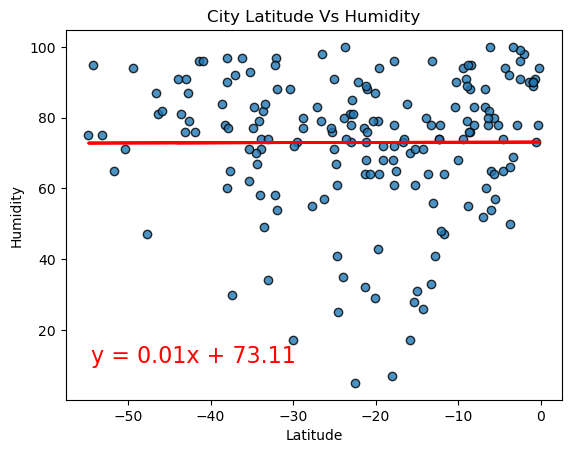

In [27]:
# Southern Hemisphere
latitude = southern_hemi_df['Lat']
humidity = southern_hemi_df['Humidity']

linear_regression_plot(latitude, humidity,  'Latitude','Humidity', 'City Latitude Vs Humidity')


**Discussion about the linear relationship:** Looking at the plot as well as the r-value, it looks like there is a weak, or non-existant, correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.06171187098313816


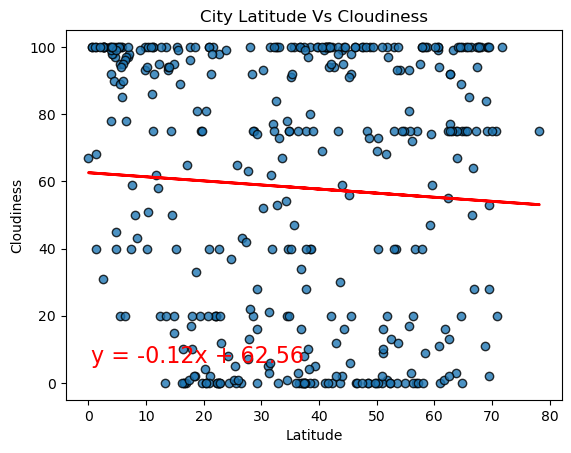

In [28]:
# Northern Hemisphere
latitude = northern_hemi_df['Lat']
Cloudiness = northern_hemi_df['Cloudiness']

linear_regression_plot(latitude, Cloudiness,  'Latitude','Cloudiness', 'City Latitude Vs Cloudiness')



The r-value is: -0.15866303348648841


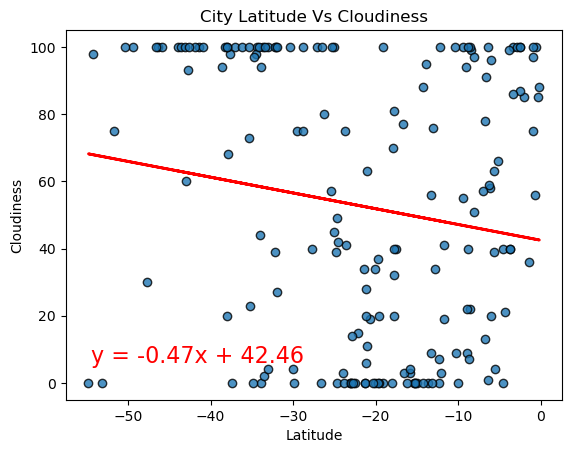

In [29]:
# Southern Hemisphere
latitude = southern_hemi_df['Lat']
Cloudiness = southern_hemi_df['Cloudiness']

linear_regression_plot(latitude, Cloudiness,  'Latitude','Cloudiness', 'City Latitude Vs Cloudiness')



**Discussion about the linear relationship:** The plot and r-value indicate that there is a weak negative correlation between latitude and cloudiness in the southern hemisphere. There is almost no correlation between cloudiness and latitude in the northern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03334387699665488


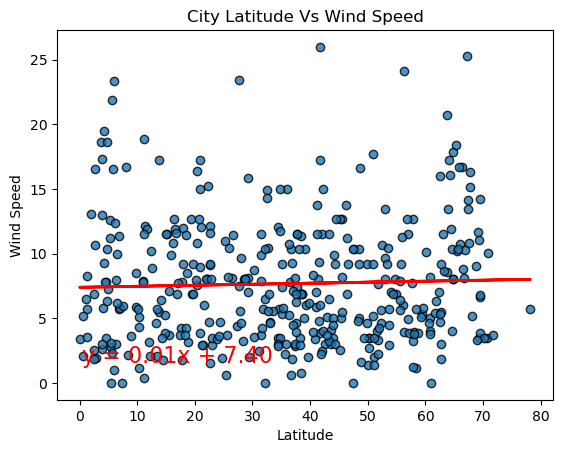

In [30]:
# Northern Hemisphere
latitude = northern_hemi_df['Lat']
Wind_Speed = northern_hemi_df['Wind Speed']

linear_regression_plot(latitude, Wind_Speed,  'Latitude','Wind Speed', 'City Latitude Vs Wind Speed')



The r-value is: -0.1580433619659635


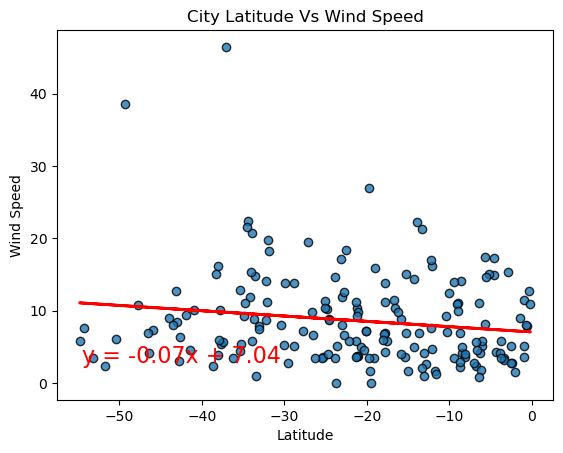

In [31]:
# Southern Hemisphere
latitude = southern_hemi_df['Lat']
Wind_Speed = southern_hemi_df['Wind Speed']

linear_regression_plot(latitude, Wind_Speed,  'Latitude','Wind Speed', 'City Latitude Vs Wind Speed')

**Discussion about the linear relationship:** Looking at the plot as well as the r-value, it looks like there is a weak, or non-existant, correlation between latitude and wind speed. The southern hemisphere did have more outliers above 25 mph compared to the northern hemisphere. 